data from: https://www.kaggle.com/arjunbhasin2013/ccdata

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [228]:
df = pd.read_csv("CC_GENERAL.csv")

In [229]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## check for NaNs

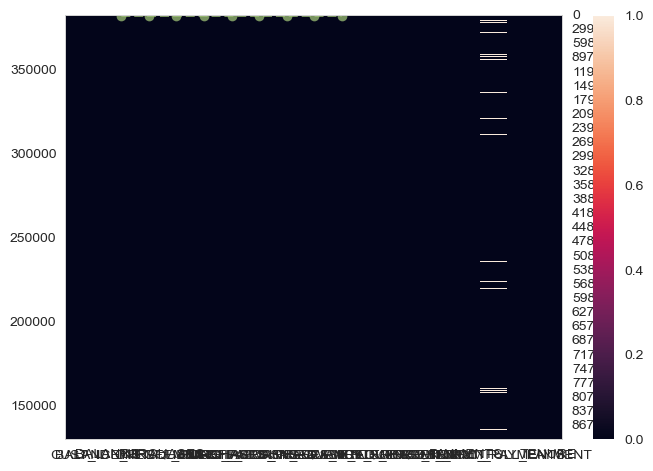

In [230]:
sns.heatmap(data=df.isna())
plt.show()

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [232]:
df.dropna(inplace=True)

# reorder columns
col_order = """
BALANCE
BALANCE_FREQUENCY
PURCHASES
PURCHASES_FREQUENCY
PURCHASES_TRX
ONEOFF_PURCHASES
ONEOFF_PURCHASES_FREQUENCY
INSTALLMENTS_PURCHASES
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
CREDIT_LIMIT
TENURE
""".split()

df = df[col_order].copy()

# cols_to_log = "BALANCE PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE CREDIT_LIMIT PAYMENTS MINIMUM_PAYMENTS".split()
# for i in cols_to_log:
#     df.loc[df[i] != 0, i] = np.log(df.loc[df[i] != 0, i])

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   PURCHASES_FREQUENCY               8636 non-null   float64
 4   PURCHASES_TRX                     8636 non-null   int64  
 5   ONEOFF_PURCHASES                  8636 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 7   INSTALLMENTS_PURCHASES            8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE                      8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PAYMEN

## Integrate columns into a single metric

In [381]:
metric_dict = {
    "balance": "BALANCE BALANCE_FREQUENCY".split()
    , "purchases": "PURCHASES PURCHASES_FREQUENCY PURCHASES_TRX".split()
    , "one-off": "ONEOFF_PURCHASES ONEOFF_PURCHASES_FREQUENCY".split()
    , "installments": "INSTALLMENTS_PURCHASES PURCHASES_INSTALLMENTS_FREQUENCY".split()
    , "cash_advance": "CASH_ADVANCE CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX".split()
    , "payments": "PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT".split()
    , "credit-limit": "CREDIT_LIMIT ".split()
}

pipe = make_pipeline(StandardScaler(), PCA(n_components=1))

df_reduced = pd.DataFrame()

for i, j in metric_dict.items():

    X = df[j]
    
    df_reduced[i] = pipe.fit_transform(X).flatten()

    print(pipe[1].explained_variance_ratio_)
    
df_reduced

[0.65507023]
[0.70265597]
[0.76225703]
[0.75556515]
[0.79771904]
[0.38169854]
[1.]


,balance,purchases,one-off,installments,cash_advance,payments,credit-limit
0,-0.788192,-1.002474,-0.739238,-0.758022,-0.943140,-0.097570,-0.962575
1,0.588193,-1.295695,-0.739238,-0.979598,1.791005,0.178760,0.677204
2,0.659028,0.516978,1.942112,-0.979598,-0.943140,0.104699,0.813852
3,0.092980,-1.157508,-0.536126,-0.979598,-0.943140,-0.016080,-0.907916
4,0.427768,0.130069,-0.739238,1.084487,-0.943140,0.768717,-0.743938
...,...,...,...,...,...,...,...
8631,-1.883330,-1.047160,-0.337672,-0.979598,-0.943140,-0.143318,-1.099224
8632,-0.173341,0.239547,-0.739238,0.725122,-0.943140,-1.047358,-0.962575
8633,-0.742513,-0.042421,-0.739238,0.315953,-0.943140,-0.594242,-0.962575
8634,-0.745868,-1.295695,-0.739238,-0.979598,-0.275185,-0.605862,-1.099224


In [515]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   balance       8636 non-null   float64
 1   purchases     8636 non-null   float64
 2   one-off       8636 non-null   float64
 3   installments  8636 non-null   float64
 4   cash_advance  8636 non-null   float64
 5   payments      8636 non-null   float64
 6   credit-limit  8636 non-null   float64
 7   clusters      8636 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 506.1 KB


## Find the right number of clusters

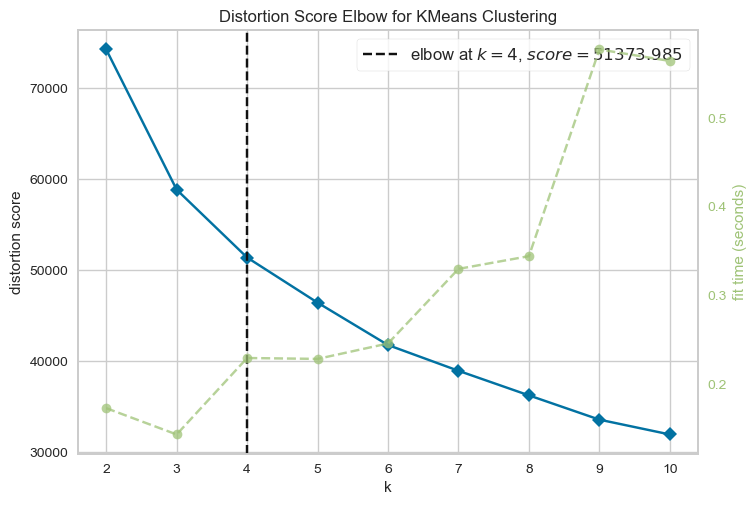

In [382]:
X = df_reduced.copy()

pipe = make_pipeline(KElbowVisualizer(KMeans()))

pipe.fit(X)
pipe[0].show()
plt.show()

In [392]:
X

,balance,purchases,one-off,installments,cash_advance,payments,credit-limit
0,-0.788192,-1.002474,-0.739238,-0.758022,-0.943140,-0.097570,-0.962575
1,0.588193,-1.295695,-0.739238,-0.979598,1.791005,0.178760,0.677204
2,0.659028,0.516978,1.942112,-0.979598,-0.943140,0.104699,0.813852
3,0.092980,-1.157508,-0.536126,-0.979598,-0.943140,-0.016080,-0.907916
4,0.427768,0.130069,-0.739238,1.084487,-0.943140,0.768717,-0.743938
...,...,...,...,...,...,...,...
8631,-1.883330,-1.047160,-0.337672,-0.979598,-0.943140,-0.143318,-1.099224
8632,-0.173341,0.239547,-0.739238,0.725122,-0.943140,-1.047358,-0.962575
8633,-0.742513,-0.042421,-0.739238,0.315953,-0.943140,-0.594242,-0.962575
8634,-0.745868,-1.295695,-0.739238,-0.979598,-0.275185,-0.605862,-1.099224


In [383]:
pipe = make_pipeline(KMeans(n_clusters=4))

pipe.fit(X)

Pipeline(steps=[('kmeans', KMeans(n_clusters=4))])

In [389]:
df_reduced["clusters"] = pipe[0].labels_

In [390]:
df_reduced

,balance,purchases,one-off,installments,cash_advance,payments,credit-limit,clusters
0,-0.788192,-1.002474,-0.739238,-0.758022,-0.943140,-0.097570,-0.962575,2
1,0.588193,-1.295695,-0.739238,-0.979598,1.791005,0.178760,0.677204,0
2,0.659028,0.516978,1.942112,-0.979598,-0.943140,0.104699,0.813852,1
3,0.092980,-1.157508,-0.536126,-0.979598,-0.943140,-0.016080,-0.907916,2
4,0.427768,0.130069,-0.739238,1.084487,-0.943140,0.768717,-0.743938,1
...,...,...,...,...,...,...,...,...
8631,-1.883330,-1.047160,-0.337672,-0.979598,-0.943140,-0.143318,-1.099224,2
8632,-0.173341,0.239547,-0.739238,0.725122,-0.943140,-1.047358,-0.962575,1
8633,-0.742513,-0.042421,-0.739238,0.315953,-0.943140,-0.594242,-0.962575,1
8634,-0.745868,-1.295695,-0.739238,-0.979598,-0.275185,-0.605862,-1.099224,2


In [396]:
df_reduced

,balance,purchases,one-off,installments,cash_advance,payments,credit-limit,clusters
0,-0.788192,-1.002474,-0.739238,-0.758022,-0.943140,-0.097570,-0.962575,2
1,0.588193,-1.295695,-0.739238,-0.979598,1.791005,0.178760,0.677204,0
2,0.659028,0.516978,1.942112,-0.979598,-0.943140,0.104699,0.813852,1
3,0.092980,-1.157508,-0.536126,-0.979598,-0.943140,-0.016080,-0.907916,2
4,0.427768,0.130069,-0.739238,1.084487,-0.943140,0.768717,-0.743938,1
...,...,...,...,...,...,...,...,...
8631,-1.883330,-1.047160,-0.337672,-0.979598,-0.943140,-0.143318,-1.099224,2
8632,-0.173341,0.239547,-0.739238,0.725122,-0.943140,-1.047358,-0.962575,1
8633,-0.742513,-0.042421,-0.739238,0.315953,-0.943140,-0.594242,-0.962575,1
8634,-0.745868,-1.295695,-0.739238,-0.979598,-0.275185,-0.605862,-1.099224,2


In [535]:
def radar_plot(df, title):
    labels = df.columns.values

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    # close the plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    angles = np.concatenate((angles,[angles[0]]))
        
    for i in df.index.values:
        stats = df.loc[i].values
        stats = np.concatenate((stats,[stats[0]]))
        ax.plot(angles, stats, 'o-', linewidth=2, label=i)
#         ax.fill(angles, stats, alpha=0.25)

    
    
    
    plt.ylim([-2, 3])
    ax.grid(True)
    ax.set_thetagrids((angles * 180/np.pi)[:-1], labels, fontsize=12, fontweight="bold")
#     ax.set_title(title)
#     ax.set_title([df.loc[386,"Name"]])
    plt.legend(title="Clusters", bbox_to_anchor=(1.4, 1))
    plt.ylabel("", fontsize=16)
    plt.show()

In [549]:
rename_dict = {2: "The Sensible Ones", 1: "The Spenders", 3: "The BIG Spenders", 0: "Cash is King"}

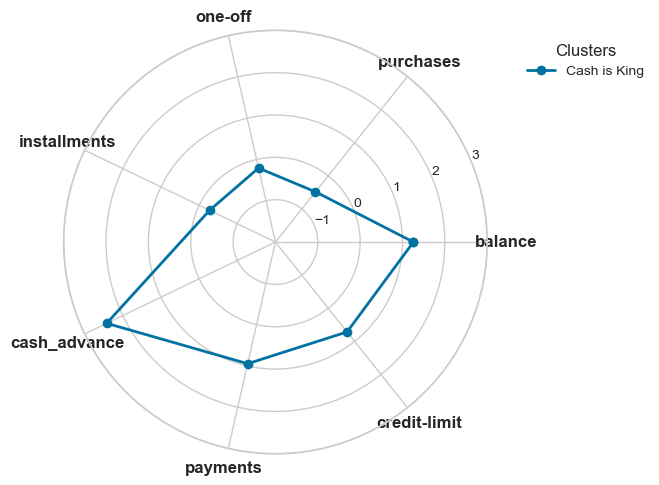

In [619]:
fig_data = data.groupby("clusters").median().reindex(index=[2,1,3,0])
fig_data = fig_data.rename(index=rename_dict)

radar_plot(fig_data.iloc[:4], "Clusters")

In [562]:
df["CLUSTERS"] = pipe[0].labels_

In [606]:
df_reduced.clusters = df_reduced.clusters.map(rename_dict)

In [564]:
df.CLUSTERS = df.CLUSTERS.map(rename_dict)

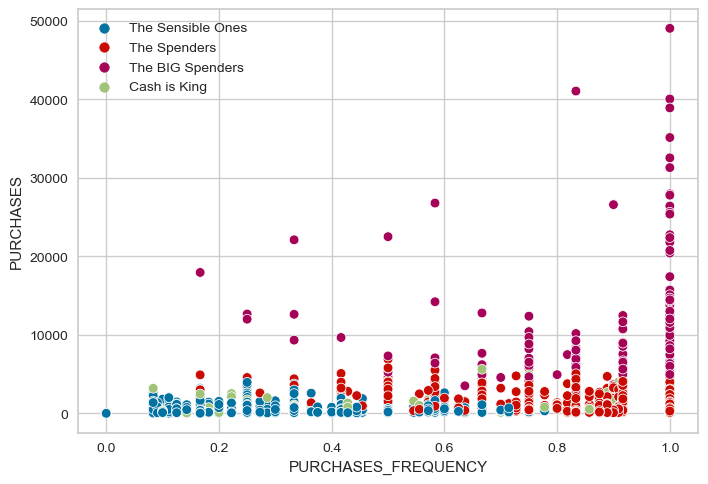

In [622]:
sns.scatterplot(data=df, x="PURCHASES_FREQUENCY", y="PURCHASES", hue="CLUSTERS")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,3,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.show()

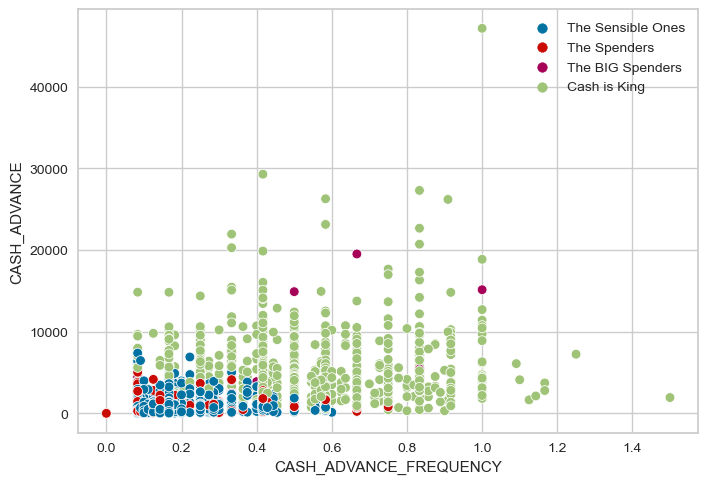

In [621]:
sns.scatterplot(data=df, x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE", hue="CLUSTERS")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,3,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.show()

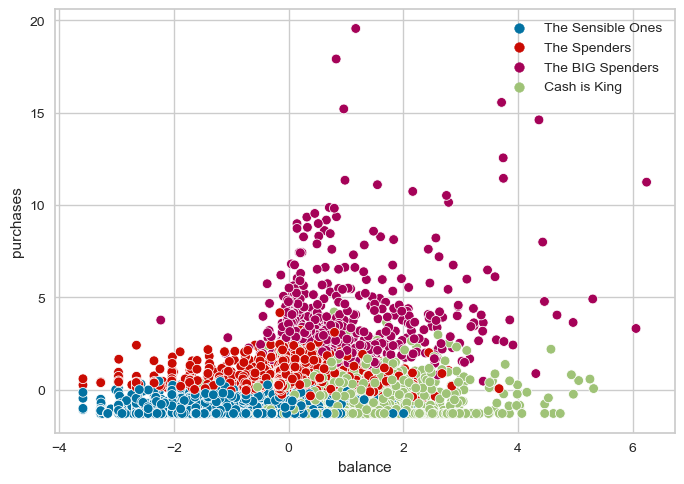

In [626]:
sns.scatterplot(data=df_reduced, y="purchases", x="balance", hue="clusters")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,3,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.show()

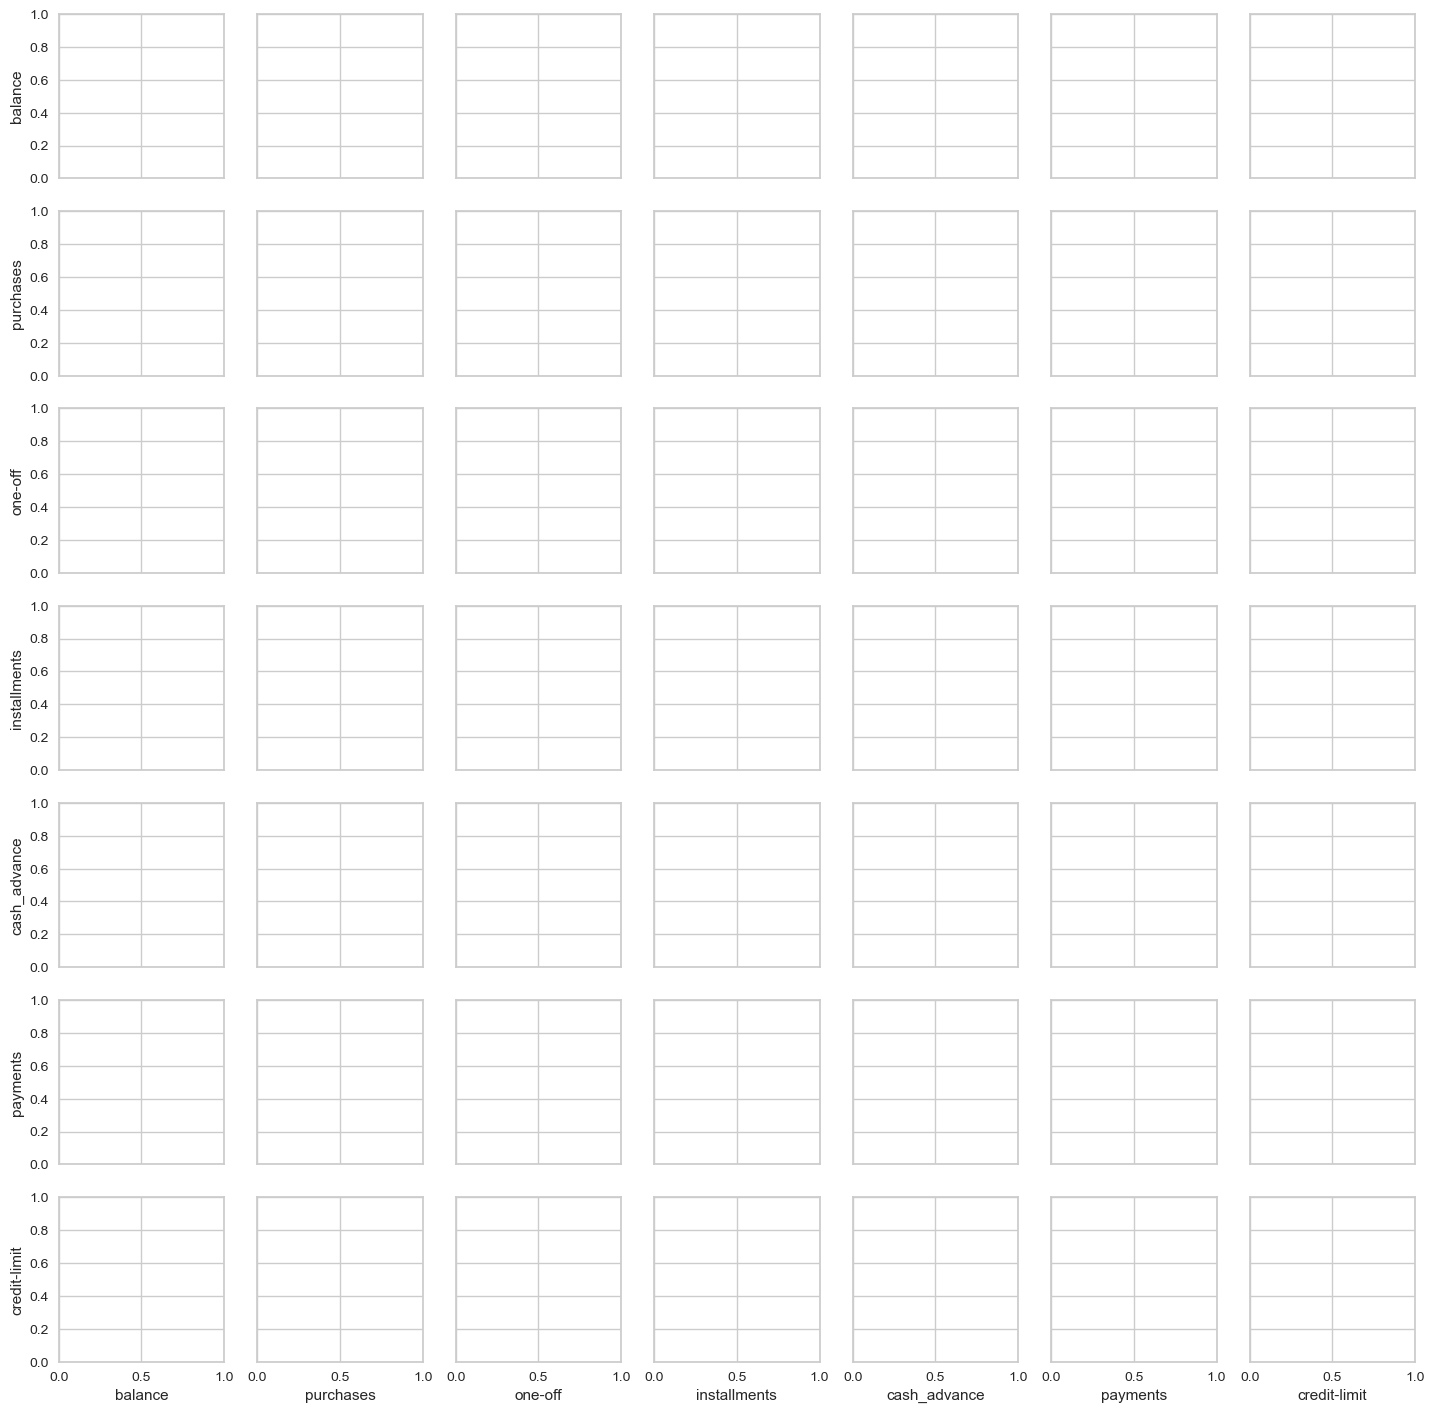

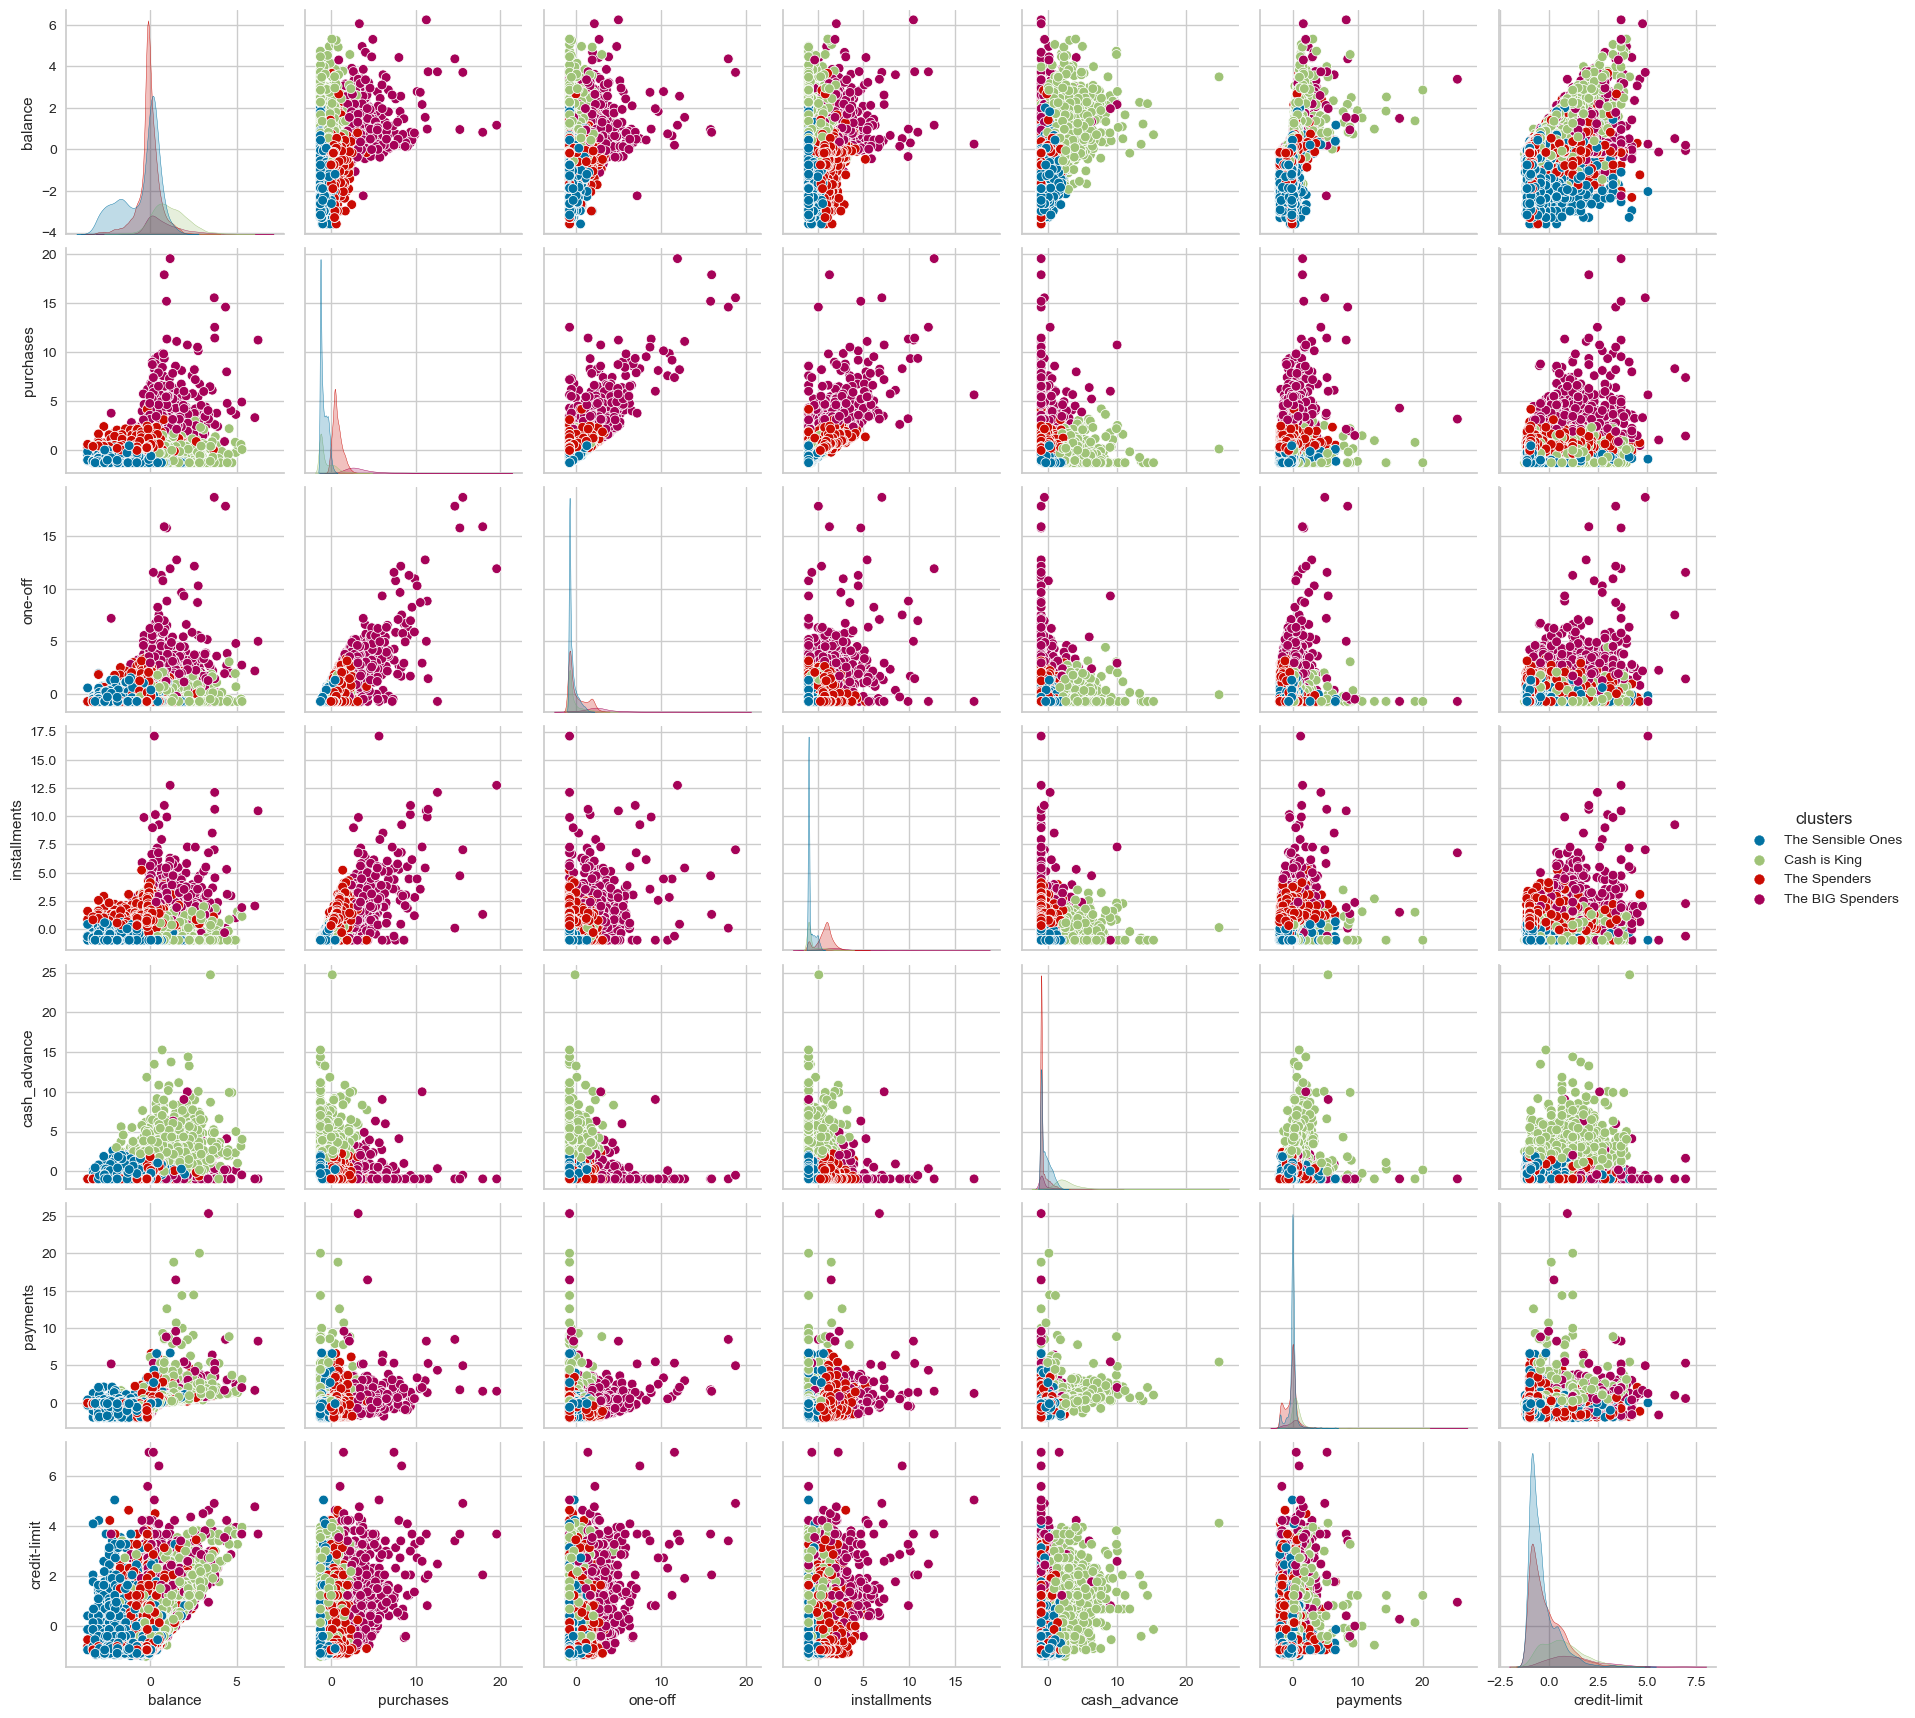

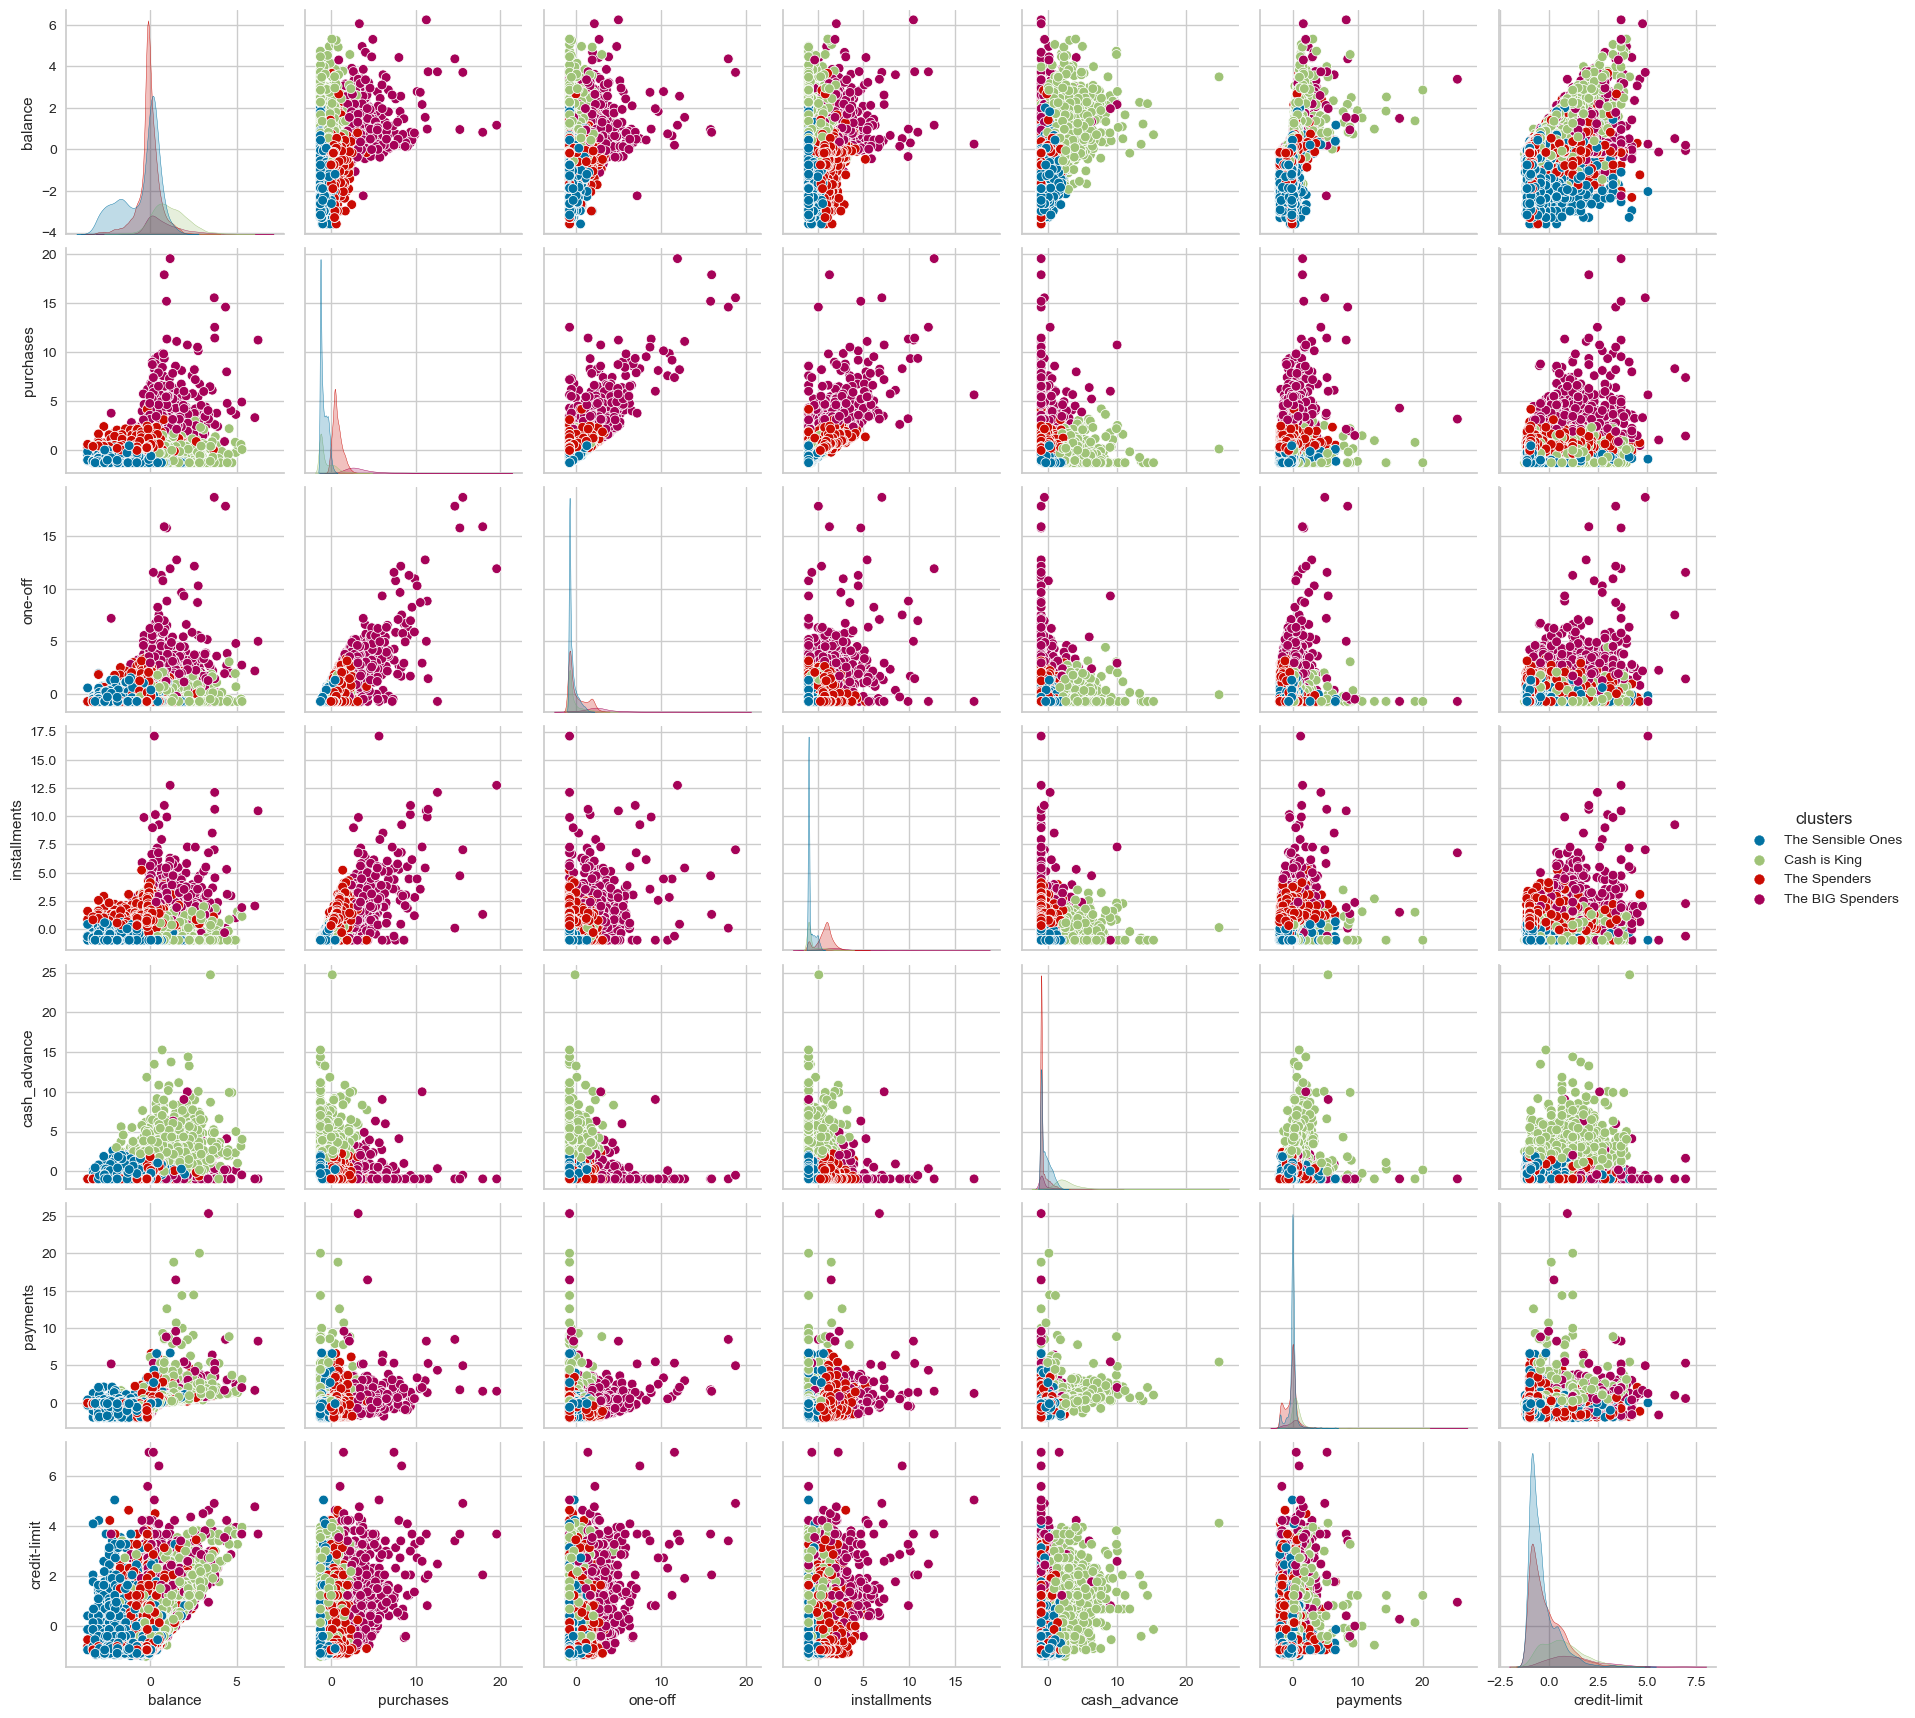

In [609]:
sns.pairplot(data=df_reduced, hue="clusters")
plt.show()

In [605]:
plt.show()